#### Overview
* Network: 지도상의 네트워크(그리드)를 분석하는 방법
* 이를통해 `경로(path)분석`등을 수행함

##### OSMNX
* OSMNX: Open Street Map Network X
* 개발자 블로그
  * https://geoffboeing.com/2016/11/osmnx-python-street-networks/
* 소스코드
  * https://github.com/gboeing/osmnx
  * https://pypi.org/project/osmnx/
* 예제
  * https://github.com/gboeing/osmnx-examples/tree/master/notebooks
* 참고 사이트
  * https://networkx.org/documentation/stable//index.html

#### Import Libraries

In [40]:
import os
import pandas as pd
import geopandas as gpd
from IPython.display import IFrame

# Graph base on Network Analysis
import networkx as nx   
# Spatial Data Network Analysis
import osmnx as ox
import folium

import requests

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.cm as cm
import matplotlib.colors as colors
from shapely.geometry import Point, Polygon, LineString
# shapely 객체를 matplotlib에서 사용할 수 있도록 지원하는 라이브러리
from descartes import PolygonPatch

In [2]:
ox.__version__

'1.6.0'

#### Settings

* osmnx

In [3]:
# osmnx 로그를 콘솔에 표시
ox.settings.log_console = True

* Using Korean Font

In [4]:
# matplotlib 한글 처리
# --> 아래와 같이 했는데 한글처리가 안되는 경우 편집기를 재시작하면됨.
# plt.rcParams['font.family'] = 'NanumGothic'
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_family = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_family
# 축 값에 마이너스 값이 있으면 '-'로 표시하도록 함(true로 하면 이상한게 나옴)
plt.rcParams['axes.unicode_minus'] = False
# 차트 기본 폰트 크기
plt.rcParams['figure.figsize'] = (10,10)

#### Simple OSMNX
* OSMNX(Open Street Map Network X)
* 아래줄은 한번 돌리는데 2분 가량이 소요됨

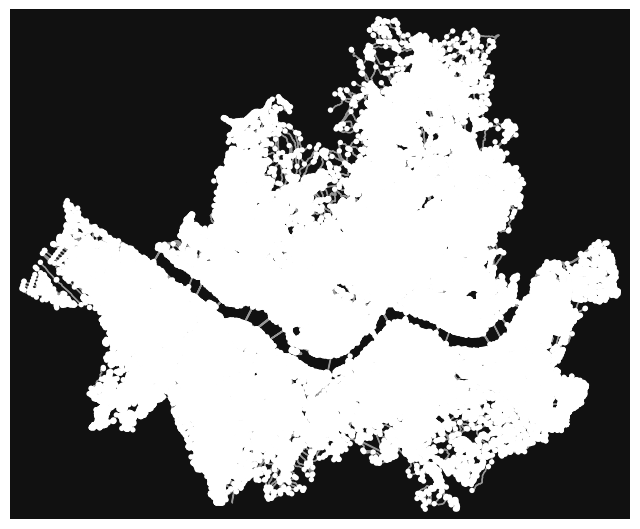

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
# ox.plot_graph(ox.graph_from_place('Seoul, Korea'))

#### Using OSMNX

##### Network type (network_type)

* `drive` : get drivable public streets (but not service roads)
* `drive_service` : get drivable public streets, including service roads
* `walk` : get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
* `bike` : get all streets and paths that cyclists can use
* `all` : download all (non-private) OSM streets and paths
* `all_private` : download all OSM streets and paths, including private-access ones

##### Create Graph

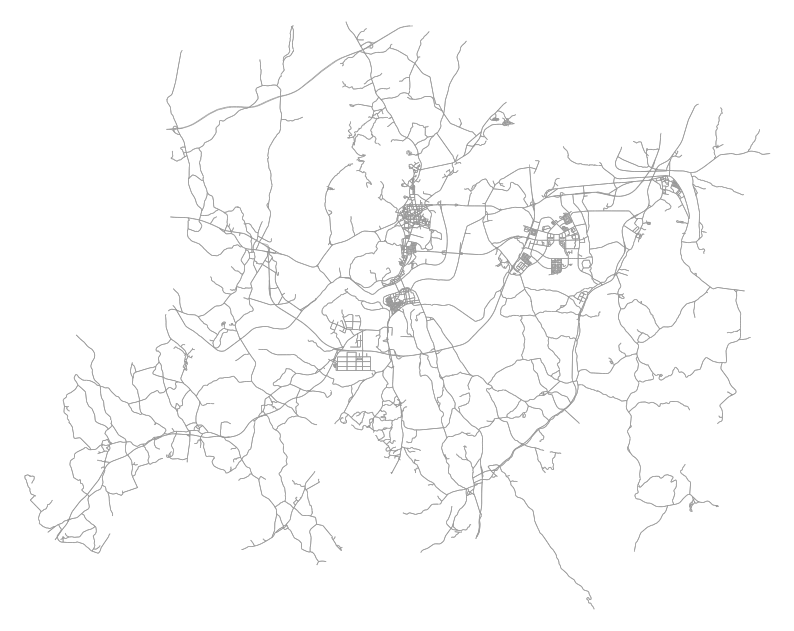

In [8]:
graph = ox.graph_from_place(
    '나주시, 전라남도, 대한민국', 
    network_type='drive',
    simplify=False,
)
fig, ax = ox.plot_graph(graph, figsize=(10,10), node_size=0, edge_linewidth=0.5, bgcolor='w')
plt.show()

##### Save Graph

In [12]:
# 마지막 폴더가 있으면 오류가 나니 폴더 자체를 지우고 실행할 것
GRAPH_SHP_PATH = os.path.join(os.getcwd(),'89_data', 'osmnx_my.gpkg')
ox.save_graph_geopackage(graph, filepath=GRAPH_SHP_PATH)

##### Load Graph

In [13]:
new_graph = ox.load_graphml(GRAPH_SHP_PATH)
# 이렇게 한다는데, 에러나네;;;

ParseError: syntax error: line 1, column 0 (<string>)

#### Shortest Path Analysis

##### Create Basic Graph

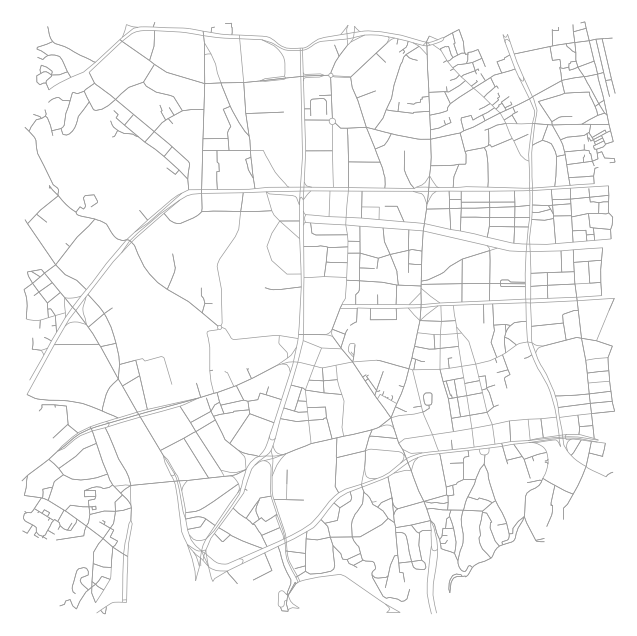

In [15]:
BASE_POINT = (37.5655, 126.9779)
graph = ox.graph_from_point(BASE_POINT, dist=1200, network_type='drive_service')
ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, bgcolor='w')
plt.show()

##### Shortest Path Analysis

In [17]:
# 두 지점 지정
SP_X, SP_Y = 37.557638657147585, 126.97322081586789
EP_X, EP_Y = 37.57442565618067, 126.98542855257266
start_node = ox.nearest_nodes(graph, SP_Y, SP_X)
end_node = ox.nearest_nodes(graph, EP_Y, EP_X)

In [18]:
shortest_route = nx.shortest_path(graph, start_node, end_node, weight='length')

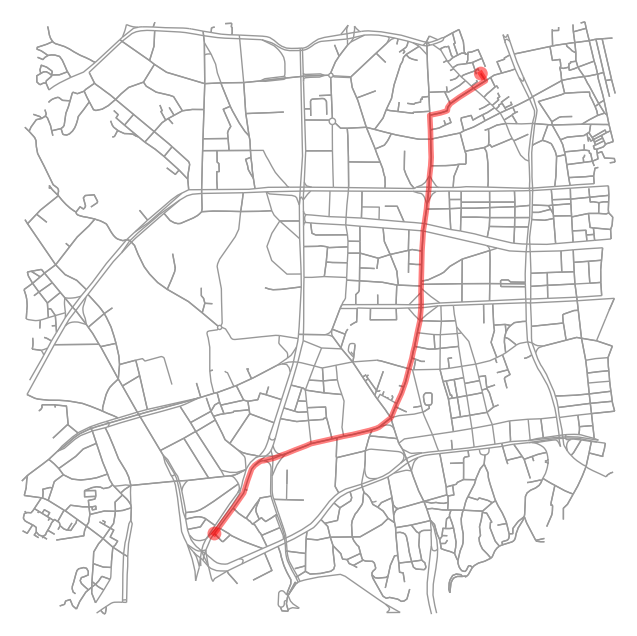

In [19]:
fig, ax = ox.plot_graph_route(graph, shortest_route, node_size=0, bgcolor='w')
plt.show()

#### Graph to GeoDataFrame

In [20]:
nodes_gdf, edges_gdf = ox.graph_to_gdfs(graph)

In [21]:
nodes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1262 entries, 287631232 to 11076228527
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   y             1262 non-null   float64 
 1   x             1262 non-null   float64 
 2   street_count  1262 non-null   int64   
 3   highway       9 non-null      object  
 4   geometry      1262 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 59.2+ KB


In [23]:
nodes_gdf.head()

,y,x,street_count,highway,geometry
osmid,,,,,
287631232,37.570051,126.972549,4,NaN,POINT (126.97255 37.57005)
287712142,37.574041,126.972691,4,NaN,POINT (126.97269 37.57404)
287712330,37.570189,126.972549,4,NaN,POINT (126.97255 37.57019)
288549755,37.575529,126.972674,3,NaN,POINT (126.97267 37.57553)
292395181,37.573250,126.985872,3,NaN,POINT (126.98587 37.57325)


In [22]:
edges_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 2901 entries, (287631232, 1936511583, 0) to (11076228527, 11076228526, 0)
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     2901 non-null   object  
 1   oneway    2901 non-null   bool    
 2   lanes     351 non-null    object  
 3   ref       144 non-null    object  
 4   name      2445 non-null   object  
 5   highway   2901 non-null   object  
 6   maxspeed  146 non-null    object  
 7   reversed  2901 non-null   object  
 8   length    2901 non-null   float64 
 9   geometry  2901 non-null   geometry
 10  junction  9 non-null      object  
 11  tunnel    31 non-null     object  
 12  bridge    15 non-null     object  
 13  access    14 non-null     object  
 14  service   22 non-null     object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 418.7+ KB


In [24]:
edges_gdf.head()

osmid  oneway lanes  ref    name      highway  \
u         v          key                                                      
287631232 1936511583 0    919985574    True     4    6    새문안로      primary   
          2930525587 0    180793307   False   NaN  NaN    새문안로  residential   
          287712330  0    919985573   False   NaN  NaN  새문안로3길  residential   
287712142 436807109  0     37399752   False     4  NaN   사직로8길     tertiary   
          8485472813 0    516417604   False   NaN  NaN  새문안로3길  residential   

                         maxspeed reversed   length  \
u         v          key                              
287631232 1936511583 0         60    False  168.025   
          2930525587 0        NaN     True   73.923   
          287712330  0        NaN    False   15.334   
287712142 436807109  0        NaN    False   65.804   
          8485472813 0        NaN    False  115.515   

                                                                   geometry  \
u         v          key                                                      
287631232 1936511583 0    LINESTRING (126.97255 37.57005, 126.97446 37.5...   
          2930525587 0    LINESTRING (126.97255 37.57005, 126.97257 37.5...   
          287712330  0    LINESTRING (126.97255 37.57005, 126.97255 37.5...   
287712142 436807109  0    LINESTRING (126.97269 37.57404, 126.97344 37.5...   
          8485472813 0    LINESTRING (126.97269 37.57404, 126.97268 37.5...   

                         junction tunnel bridge access service  
u         v          key                                        
287631232 1936511583 0        NaN    NaN    NaN    NaN     NaN  
          2930525587 0        NaN    NaN    NaN    NaN     NaN  
          287712330  0        NaN    NaN    NaN    NaN     NaN  
287712142 436807109  0        NaN    NaN    NaN    NaN     NaN  
          8485472813 0        NaN    NaN    NaN    NaN     NaN

#### Shortest Time Analysis

##### Calculate Edge Travel Times

In [25]:
# speed_kph 추가
graph = ox.add_edge_speeds(graph)
# travel_time 추가
graph = ox.add_edge_travel_times(graph)

In [26]:
nodes_gdf2, edges_gdf2 = ox.graph_to_gdfs(graph)

In [27]:
nodes_gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1262 entries, 287631232 to 11076228527
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   y             1262 non-null   float64 
 1   x             1262 non-null   float64 
 2   street_count  1262 non-null   int64   
 3   highway       9 non-null      object  
 4   geometry      1262 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 59.2+ KB


In [28]:
edges_gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 2901 entries, (287631232, 1936511583, 0) to (11076228527, 11076228526, 0)
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   osmid        2901 non-null   object  
 1   oneway       2901 non-null   bool    
 2   lanes        351 non-null    object  
 3   ref          144 non-null    object  
 4   name         2445 non-null   object  
 5   highway      2901 non-null   object  
 6   maxspeed     146 non-null    object  
 7   reversed     2901 non-null   object  
 8   length       2901 non-null   float64 
 9   speed_kph    2901 non-null   float64 
 10  travel_time  2901 non-null   float64 
 11  geometry     2901 non-null   geometry
 12  junction     9 non-null      object  
 13  tunnel       31 non-null     object  
 14  bridge       15 non-null     object  
 15  access       14 non-null     object  
 16  service      22 non-null     object  
dtypes: bool(1), f

In [29]:
short_time_route = ox.shortest_path(graph, start_node, end_node, weight='travel_time')

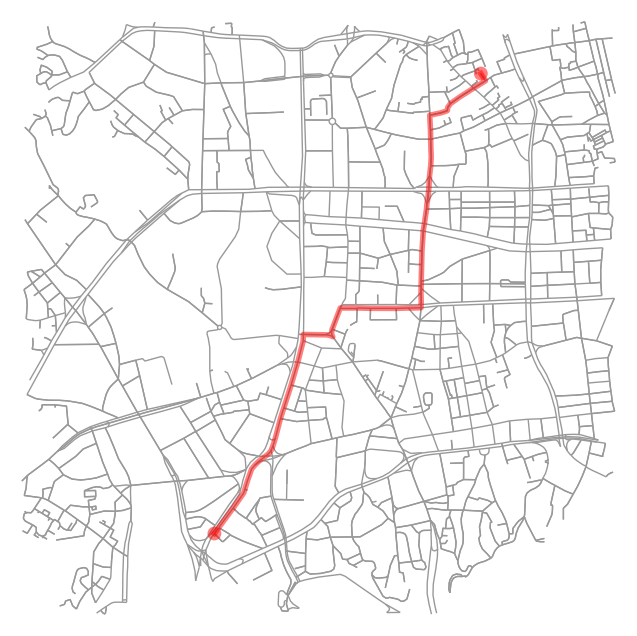

In [30]:
fig, ax = ox.plot_graph_route(graph, short_time_route, node_size=0, bgcolor='w')
plt.show()

#### Optimal(Road Class and Time) Path Analysis
* OSM 경로 데이터의 타입별로 기준 속도를 부여하고, 이 기준속도와 도형의 길이를 가지고 소요시간을 산출하여 최적경로 산출

In [31]:
# 도로 유형별 기준속도 부여
hwy_speeds = {
    "mortorway" : 80, 
    "primary" : 55, 
    "secondary": 50, 
    "tertiary": 60, 
    "residential": 20, 
    "living_street": 20, 
    "service": 20, 
    "unclassified": 10, 
    "road": 10
}

# 기준속도를 기반으로 에지별 속도 및 시간 계산
graph = ox.add_edge_speeds(graph, hwy_speeds)
graph = ox.add_edge_travel_times(graph)

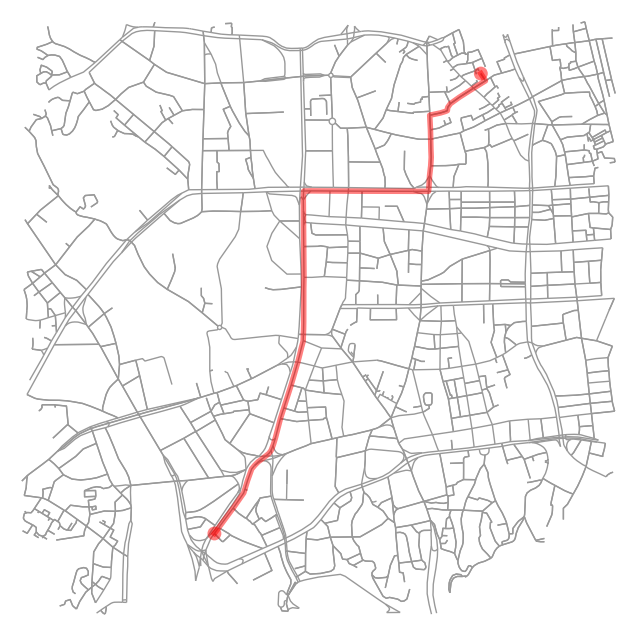

In [33]:
optimal_route = ox.shortest_path(graph, start_node, end_node, weight='travel_time')
fig, ax = ox.plot_graph_route(graph, optimal_route, node_size=0, bgcolor='w')
plt.show()

#### Comparative Analysis

* 한 지도에 2개의 경로를 표시하는 부분은 좀 더 해봐야 할 것 같음

AttributeError: 'Figure' object has no attribute 'add_to'

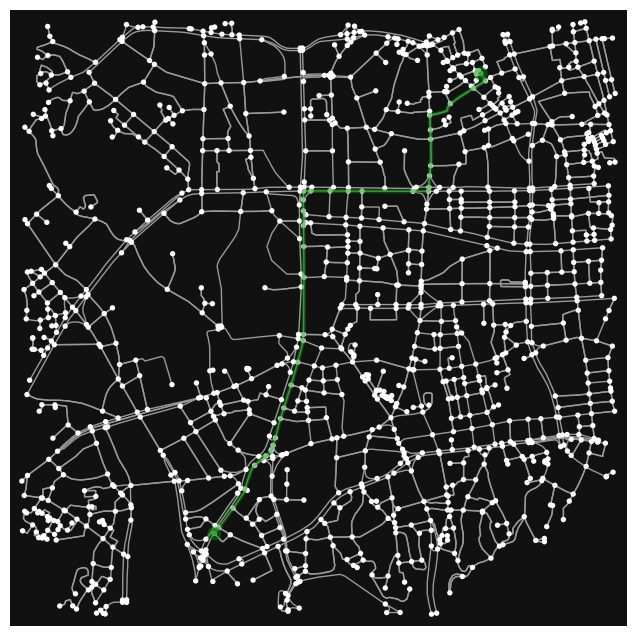

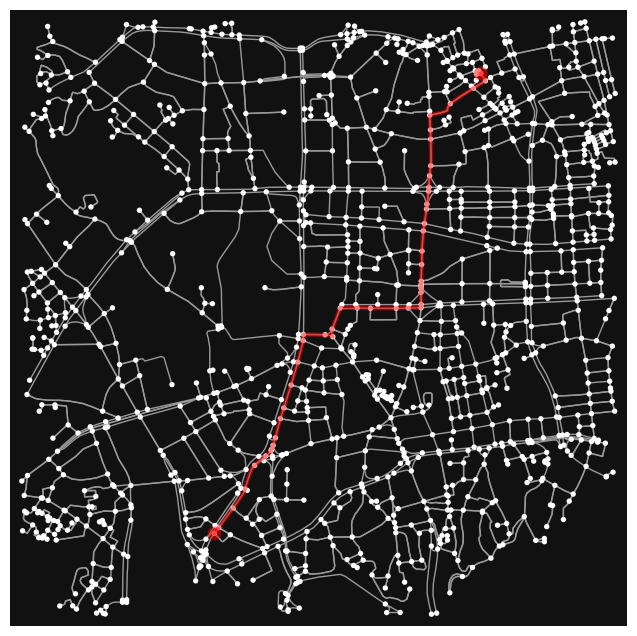

In [47]:
base_map = folium.Map(location=[SP_Y, SP_X], zoom_start=14)
# 최적 경로와 최단 경로를 지도에 추가
optimal_line, _ = ox.plot_graph_route(
    graph, optimal_route, route_color='green', route_linewidth=3, show=False, close=False
)
shortest_line, _ = ox.plot_graph_route(
    graph, short_time_route, route_color='red', route_linewidth=3, show=False, close=False
)

# 지도에 추가된 라인을 지도 객체에 추가
optimal_line.add_to(base_map)
shortest_line.add_to(base_map)

base_map

#### Save Map

In [34]:
MAP_FILE_PATH = os.path.join(
    os.getcwd(), '89_data', 'result', 'optimal_map.html'
)

optimal_map = ox.plot_route_folium(
    graph, optimal_route, popup_attribute='name', weight=3, color='Red'
)
optimal_map.save(MAP_FILE_PATH)

C:\Users\freeman\AppData\Local\Temp\ipykernel_16936\2451996273.py:5: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  optimal_map = ox.plot_route_folium(


In [49]:
# 네이버 클라우드 API 설정
CLIENT_ID = ''
CLIENT_SECRET = ''

# 출발지와 도착지 좌표
latitude_origin, longitude_origin = SP_Y, SP_X
latitude_destination, longitude_destination = EP_Y, EP_X
origin = (latitude_origin, longitude_origin)
destination = (latitude_destination, longitude_destination)

# 최적 경로 조회 (시간 기준)
url_optimal = f'https://naveropenapi.apigw.ntruss.com/map-direction/v1/driving?start={origin[0]},{origin[1]}&goal={destination[0]},{destination[1]}&option=trafast&format=json'
headers = {
    'X-NCP-APIGW-API-KEY-ID': CLIENT_ID,
    'X-NCP-APIGW-API-KEY': CLIENT_SECRET
}
response_optimal = requests.get(url_optimal, headers=headers)
data_optimal = response_optimal.json()

# 최적 경로 좌표 가져오기
optimal_path = data_optimal['route']['trafast'][0]['path']

# 지도 생성
m = folium.Map(location=[(latitude_origin + latitude_destination) / 2, (longitude_origin + longitude_destination) / 2], zoom_start=14)

# 최적 경로 좌표를 지도에 표시
for coord in optimal_path:
    folium.CircleMarker(
        location=[coord[1], coord[0]],
        radius=3,
        color='green',
        fill=True,
        fill_color='green'
    ).add_to(m)

# 출발지와 도착지 마커 추가
folium.Marker(
    location=origin,
    popup='출발지',
    icon=folium.Icon(color='blue')
).add_to(m)
folium.Marker(
    location=destination,
    popup='도착지',
    icon=folium.Icon(color='red')
).add_to(m)

# 지도 출력
m.save('route_map.html')